In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['mathtext.fontset'] = 'cm'

# file_name = 'time_vs_error.xlsx'
# file_name = 'wt_theta_success.xlsx'
# file_name = 'wt_theta_fail.xlsx'
# file_name = 'effective_lr.xlsx'
# file_name = 'invariant_fix_LRWD.xlsx'
# file_name = 'efficientnet_small.xlsx'
# file_name = 'variant_fixed_N_LR.xlsx'
file_name = 'WD.xlsx'
data = pd.read_excel(file_name, header=0, index_col=0, engine='openpyxl').dropna(axis='columns', how='all')
data.head()

: 

In [9]:
mean = data.iloc[0::2, 1:]
std = data.iloc[1::2, 1:]
mean.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"(N,B,LR,WD)",,,,,,,,,,,,,,,,,,,,,
"(3125,128,0.001,2.56)",11.724712,10.780603,10.139930,9.836294,9.708442,9.661169,9.818432,9.729292,10.192968,9.969199,...,0.079026,0.071646,0.085456,0.087258,0.071185,0.103509,0.067263,0.062460,0.079291,0.072948
"(6250,128,0.001,1.28)",17.369148,14.985301,13.126736,12.520727,12.219664,12.043552,12.008056,11.687559,11.711806,11.764884,...,0.153495,0.131703,0.118141,0.097721,0.129913,0.133613,0.140079,0.140865,0.144610,0.195606
"(12500,128,0.001,0.64)",24.702830,18.233802,16.035095,14.658408,13.933103,13.393234,13.159321,13.005679,13.050867,13.165272,...,0.233339,0.188593,0.304519,0.275693,0.273836,0.188912,0.266826,0.175593,0.241278,0.217640
"(25000,128,0.001,0.32)",32.812593,21.533569,17.861423,16.198689,15.554297,15.192115,14.655153,14.299926,14.091157,14.234489,...,0.249905,0.215466,0.258530,0.245497,0.202538,0.284813,0.279650,0.302830,0.312677,0.301616
"(50000,128,0.001,0.16)",41.635517,23.581155,19.744949,17.674409,16.416056,15.672100,15.392690,15.126246,14.964328,14.909657,...,0.237795,0.311856,0.211342,0.211339,0.307501,0.240218,0.232089,0.296024,0.293707,0.246921


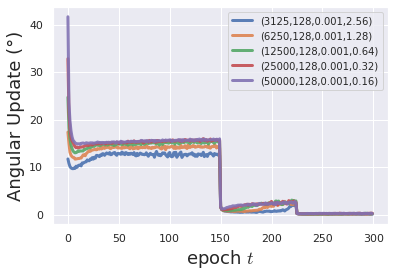

In [10]:
sns.set(style="darkgrid")

fig, ax = plt.subplots()
ax.set_xlabel('epoch $t$', fontsize=18)
ax.set_ylabel('Angular Update ({})'.format(u"\N{DEGREE SIGN}"), fontsize=18)
# ax.set_ylabel('effective LR', fontsize=18)
# ax.set_ylabel('effective LR * N/B', fontsize=18)

i=0
for a, b in zip(mean.iterrows(), std.iterrows()):
    alpha, m = a
    _, s = b

    if i<6:
        # ax.plot(m, linewidth=3, alpha=0.9, label=r'$\alpha^2$ = '+f'{alpha:.0E}')
        ax.plot(m, linewidth=3, alpha=0.9, label=alpha)
        # ax.fill_between(range(len(m)), m+s, m-s, alpha=0.2)
        i+=1

plt.legend(loc='upper right', prop={'size': 10})
# plt.ylim(0,20)
# fig.savefig('observe_wt_theta_success.pdf', dpi=300, bbox_inches='tight')
# fig.savefig('observe_wt_theta_fail.pdf', dpi=300, bbox_inches='tight')
# fig.savefig('effective_lr.pdf', dpi=300, bbox_inches='tight')
fig.savefig('AdamW_WD.pdf', dpi=300, bbox_inches='tight')